In [2]:
import numpy as np
import collections
import matplotlib.pyplot as plt
import queue
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

In [3]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [4]:
#Define label for differnt point group
NOISE = 0
UNASSIGNED = 0
core=-1
edge=-2

In [5]:
#function to find all neigbor points in radius
def neighbor_points(data, pointId, radius):
    points = []
    for i in range(len(data)):
        #Euclidian distance using L2 Norm
        if np.linalg.norm(data[i] - data[pointId]) <= radius:
            points.append(i)
    return points

In [6]:
#DB Scan algorithom
def dbscan(data, Eps, MinPt):
    #initilize all pointlable to unassign
    pointlabel  = [UNASSIGNED] * len(data)
    pointcount = []
    #initilize list for core/noncore point
    corepoint=[]
    noncore=[]
    
    #Find all neigbor for all point
    for i in range(len(data)):
        pointcount.append(neighbor_points(train,i,Eps))
    
    #Find all core point, edgepoint and noise
    for i in range(len(pointcount)):
        if (len(pointcount[i])>=MinPt):
            pointlabel[i]=core
            corepoint.append(i)
        else:
            noncore.append(i)

    for i in noncore:
        for j in pointcount[i]:
            if j in corepoint:
                pointlabel[i]=edge

                break
            
    #start assigning point to cluster
    cl = 1
    #Using a Queue to put all neigbor core point in queue and find neigboir's neigbor
    for i in range(len(pointlabel)):
        q = queue.Queue()
        if (pointlabel[i] == core):
            pointlabel[i] = cl
            for x in pointcount[i]:
                if(pointlabel[x]==core):
                    q.put(x)
                    pointlabel[x]=cl
                elif(pointlabel[x]==edge):
                    pointlabel[x]=cl
            #Stop when all point in Queue has been checked   
            while not q.empty():
                neighbors = pointcount[q.get()]
                for y in neighbors:
                    if (pointlabel[y]==core):
                        pointlabel[y]=cl
                        q.put(y)
                    if (pointlabel[y]==edge):
                        pointlabel[y]=cl            
            cl=cl+1 #move to next cluster
           
    return pointlabel,cl

In [42]:
#Function to plot final result
def plotRes(data, clusterRes, clusterNum , shape):
    nPoints = len(data)
    scatterColors = ['black', 'green', 'brown', 'red', 'purple', 'orange', 'yellow']
    fig = plt.figure(figsize=(10, 7))
    if shape == 2:
        ax = fig.add_subplot()
    else : 
        ax = fig.add_subplot(projection='3d')
    for i in range(clusterNum):
        if (i==0):
            #Plot all noise point as blue
            color='blue'
        else:
            color = scatterColors[i % len(scatterColors)]
        x1 = [];  y1 = []
        z1 = []
        if shape == 2:
            for j in range(nPoints):
                if clusterRes[j] == i:
                    x1.append(data[j, 0])
                    y1.append(data[j, 1])
            ax.scatter(x1, y1, c=color, alpha=1, marker='.')
        else:
            for j in range(nPoints):
                if clusterRes[j] == i:
                    x1.append(data[j, 0])
                    y1.append(data[j, 1])
                    z1.append(data[j, 2])
            ax.scatter(x1, y1, z1 , c=color, alpha=1)

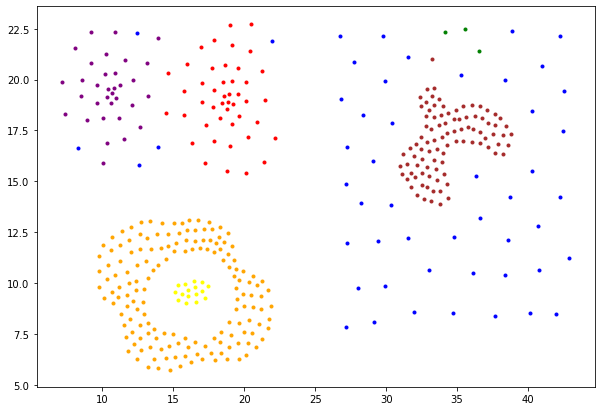

Purity Score :  0.9824561403508771


In [43]:
#Load Data
Compound =  pd.read_csv(r'D:\HomeWork\Machine Learning\ML_HW04\ML_HW04\ML_HW04\data\3\Compound.txt' , sep = " "  , header = None)

train = Compound.iloc[: , 0:2].values
Y = Compound.iloc[: , 2].values

#Set EPS and Minpoint
epss = [1.5]
minptss = [3]
# Find ALl cluster, outliers in different setting and print resultsw
for eps in epss:
    for minpts in minptss:
        pointlabel,cl = dbscan(train,eps,minpts)
        plotRes(train, pointlabel, cl , 2)
        plt.show()
        
        print('Purity Score : ' , purity_score(Y , pointlabel))

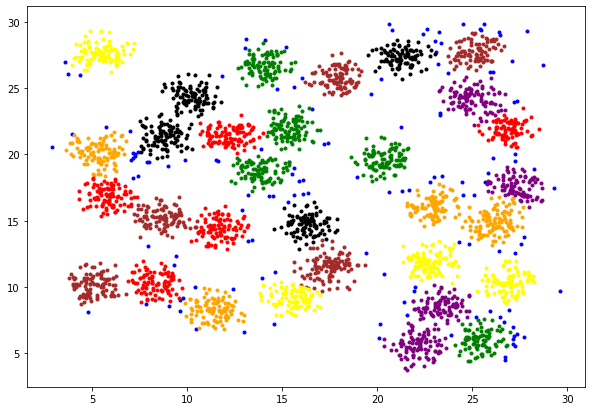

Purity Score :  0.9348387096774193


In [44]:
#Load Data
Compound =  pd.read_csv(r'D:\HomeWork\Machine Learning\ML_HW04\ML_HW04\ML_HW04\data\3\D31.txt' , sep = " "  , header = None)

train = Compound.iloc[: , 0:2].values
Y = Compound.iloc[: , 2].values

#Set EPS and Minpoint
epss = [1.3]
minptss = [67]
# Find ALl cluster, outliers in different setting and print resultsw
for eps in epss:
    for minpts in minptss:
        pointlabel,cl = dbscan(train,eps,minpts)
        plotRes(train, pointlabel, cl , 2)
        plt.show()
        
        print('Purity Score : ' , purity_score(Y , pointlabel))

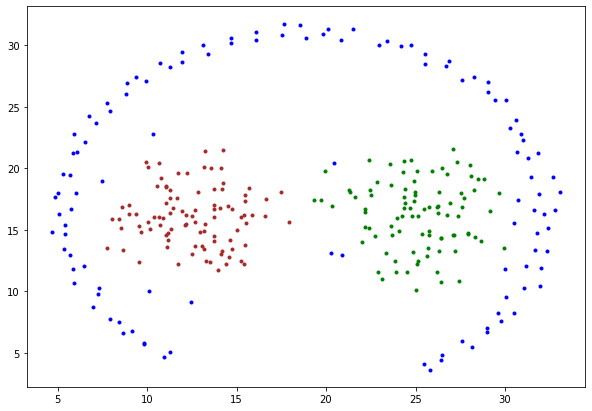

Purity Score :  0.9733333333333334


In [45]:
#Load Data
Compound =  pd.read_csv(r'D:\HomeWork\Machine Learning\ML_HW04\ML_HW04\ML_HW04\data\3\pathbased.txt' , sep = " "  , header = None)

train = Compound.iloc[: , 0:2].values
Y = Compound.iloc[: , 2].values

#Set EPS and Minpoint
epss = [2.1]
minptss = [11]
# Find ALl cluster, outliers in different setting and print resultsw
for eps in epss:
    for minpts in minptss:
        pointlabel,cl = dbscan(train,eps,minpts)
        plotRes(train, pointlabel, cl , 2)
        plt.show()
        
        print('Purity Score : ' , purity_score(Y , pointlabel))

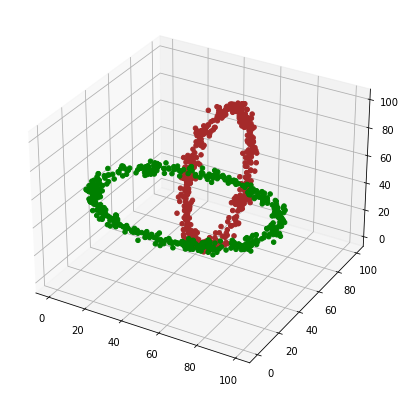

Purity Score :  1.0


In [46]:
#Load Data
Compound =  pd.read_csv(r'D:\HomeWork\Machine Learning\ML_HW04\ML_HW04\ML_HW04\data\3\rings.txt' , sep = " "  , header = None)

train = Compound.iloc[: , 1:4].values
Y = Compound.iloc[: , 0].values

#Set EPS and Minpoint
epss = [4.6]
minptss = [6]
# Find ALl cluster, outliers in different setting and print resultsw
for eps in epss:
    for minpts in minptss:
        pointlabel,cl = dbscan(train,eps,minpts)
        plotRes(train, pointlabel, cl , shape = 3)
        plt.show()
        
        print('Purity Score : ' , purity_score(Y , pointlabel))

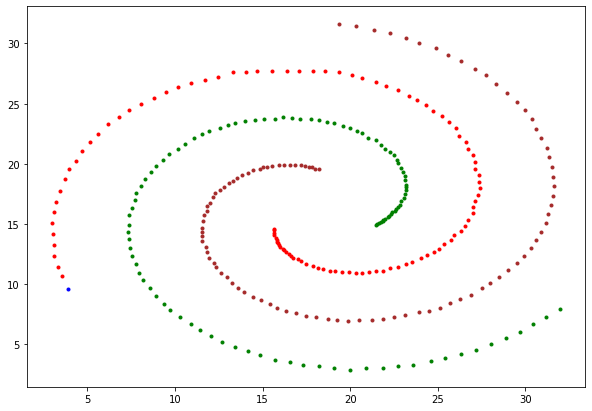

Purity Score :  1.0


In [48]:
#Load Data
Compound =  pd.read_csv(r'D:\HomeWork\Machine Learning\ML_HW04\ML_HW04\ML_HW04\data\3\spiral.txt' , sep = '\t'  , header = None)

train = Compound.iloc[: , 0:2].values
Y = Compound.iloc[: , 2].values

#Set EPS and Minpoint
epss = [1.1]
minptss = [3]
# Find ALl cluster, outliers in different setting and print resultsw
for eps in epss:
    for minpts in minptss:
        pointlabel,cl = dbscan(train,eps,minpts)
        plotRes(train, pointlabel, cl , 2)
        plt.show()
        
        print('Purity Score : ' , purity_score(Y , pointlabel))